In [1]:
import pandas as pd
import numpy as np

C:\Users\kelvi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_pickle("sarcasmv3.pkl")

In [3]:
data.head()

author                                            comment  \
0  Trumpbart                                         nc and nh    
1  Shbshb906  you do know west teams play against west teams...   
2   Creepeth  they were underdogs earlier today but since gr...   
3  icebrotha  this meme isn't funny none of the "new york ni...   
4  cush2push                    i could use one of those tools    

            subreddit                                     parent_comment  \
0            politics  yeah i get that argument at this point i'd pre...   
1                 nba  the blazers and mavericks the wests 5 and 6 se...   
2                 nfl                            they're favored to win    
3  BlackPeopleTwitter                         deadass don't kill my buzz   
4  MaddenUltimateTeam  yep can confirm i saw the tool they use for th...   

   label                                      comment_token  \
0      0                                      [nc, and, nh]   
1      0  [you, do, know, west, teams, play, against, we...   
2      0  [they, were, underdogs, earlier, today, but, s...   
3      0  [this, meme, isn't, funny, none, of, the, ", n...   
4      0             [i, could, use, one, of, those, tools]   

                                parent_comment_token  
0  [yeah, i, get, that, argument, at, this, point...  
1  [the, blazers, and, mavericks, the, wests, 5, ...  
2                        [they're, favored, to, win]  
3                   [deadass, don't, kill, my, buzz]  
4  [yep, can, confirm, i, saw, the, tool, they, u...

In [17]:
def destroy(index):
    data.drop(data.index[index], inplace = True)
    data.reset_index(drop = True, inplace = True)
    all_words = [word for tokens in data["comment_token"] for word in tokens]
    sentence_lengths = [len(tokens) for tokens in data["comment_token"]]
    VOCAB = sorted(list(set(all_words)))
    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    print("Max sentence length is %s" % max(sentence_lengths))

In [18]:
data[data.comment_token.map(len) == 1434]

author                                            comment  \
145117  12poulet21  patch notes general gameplay fixed technology ...   

       subreddit                               parent_comment  label  \
145117    gaming  no man's sky has a new update and its huge       0   

                                            comment_token  \
145117  [patch, notes, general, gameplay, fixed, techn...   

                                     parent_comment_token  
145117  [no, man's, sky, has, a, new, update, and, its...

In [19]:
destroy(145117)

10717208 words total, with a vocabulary size of 168246
Max sentence length is 1247


In [20]:
data[data.comment_token.map(len) == 1247]

author                                            comment  \
359549  ithinkPOOP  comcast comcast comcast comcast comcast comcas...   

       subreddit                                     parent_comment  label  \
359549     funny  10 months later and the swastika is still on t...      0   

                                            comment_token  \
359549  [comcast, comcast, comcast, comcast, comcast, ...   

                                     parent_comment_token  
359549  [10, months, later, and, the, swastika, is, st...

In [21]:
destroy(359549)

10715961 words total, with a vocabulary size of 168244
Max sentence length is 284


In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in data["comment_token"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["comment_token"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

10715961 words total, with a vocabulary size of 168244
Max sentence length is 284


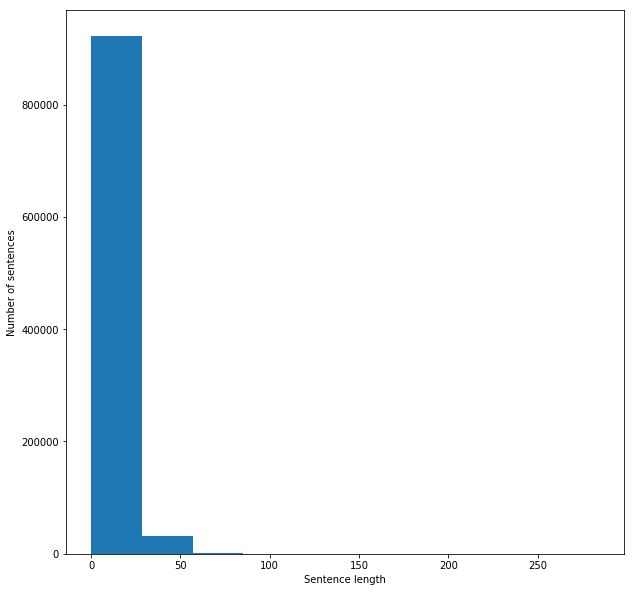

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [63]:
all_words = [word for tokens in data["parent_comment_token"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["parent_comment_token"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

24666928 words total, with a vocabulary size of 236138
Max sentence length is 4281


In [119]:
all_words = data['subreddit']
word_lengths = [len(tokens) for tokens in data["subreddit"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max word length is %s" % max(sentence_lengths))

955615 words total, with a vocabulary size of 14300
Max word length is 21


In [66]:
features = data[['subreddit','comment','parent_comment']]
labels = data['label']

In [67]:
features.head()

subreddit                                            comment  \
0            politics                                         nc and nh    
1                 nba  you do know west teams play against west teams...   
2                 nfl  they were underdogs earlier today but since gr...   
3  BlackPeopleTwitter  this meme isn't funny none of the "new york ni...   
4  MaddenUltimateTeam                    i could use one of those tools    

                                      parent_comment  
0  yeah i get that argument at this point i'd pre...  
1  the blazers and mavericks the wests 5 and 6 se...  
2                            they're favored to win   
3                         deadass don't kill my buzz  
4  yep can confirm i saw the tool they use for th...

In [68]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Convolution1D, Flatten, Dropout,MaxPooling1D
from tensorflow.python.keras.preprocessing.text import Tokenizer

x_train_text, x_test_text, y_train, y_test = train_test_split(
      features, labels, test_size=0.2, random_state=42)

In [71]:
x_train_text.head()

subreddit                                            comment  \
518197     pcmasterrace                              killer app confirmed!   
472026              PS4  yea its called playstationfourpointfive it wil...   
580389             news  yes our government must take care of us withou...   
309623              wow         daily beatings are good for the character    
108839  leagueoflegends                           aurelion sol with stars?   

                                           parent_comment  
518197       windows 10 comes with a 3d modeling program!  
472026            is there any new version of ps4 coming?  
580389  to play devils advocate here we have no idea w...  
309623  how to help my girlfriend's character? so my g...  
108839                               jax with lamp posts

In [105]:
# combine text for total corpus for tokenizing later
data_text = x_train_text + x_test_text

comment_top_words = 168000
parent_comment_top_words = 236000
subreddit_top_words = 14300

comment_tokenizer = Tokenizer(num_words= comment_top_words)
parent_tokenizer = Tokenizer(num_words = parent_comment_top_words)
subreddit_tokenizer = Tokenizer(num_words = subreddit_top_words)

comment_tokenizer.fit_on_texts(features['comment'])
parent_tokenizer.fit_on_texts(features['parent_comment'])
subreddit_tokenizer.fit_on_texts(features['subreddit'])

comment_train_tokens = comment_tokenizer.texts_to_sequences(x_train_text['comment'])
parent_train_tokens = parent_tokenizer.texts_to_sequences(x_train_text['parent_comment'])
subreddit_train_tokens = subreddit_tokenizer.texts_to_sequences(x_train_text['subreddit'])

test_comment_train_tokens = comment_tokenizer.texts_to_sequences(x_test_text['comment'])
test_parent_train_tokens = parent_tokenizer.texts_to_sequences(x_test_text['parent_comment'])
test_subreddit_train_tokens = subreddit_tokenizer.texts_to_sequences(x_test_text['subreddit'])

In [145]:
total_vocab = comment_top_words + parent_comment_top_words + subreddit_top_words

In [73]:
comment_train_tokens[0]

[2344, 1167, 540]

In [82]:
comment_dict = comment_tokenizer.word_index
inv_comment = {v: k for k, v in comment_dict.items()}

In [83]:
print(inv_comment[2344],inv_comment[1167], inv_comment[540])

killer app confirmed


In [84]:
parent_train_tokens[0]

[854, 200, 424, 16, 3, 3002, 14201, 1319]

In [85]:
parent_dict = parent_tokenizer.word_index
inv_parent = {v: k for k, v in parent_dict.items()}

In [87]:
print(inv_parent[854],inv_parent[200],inv_parent[424],inv_parent[16],inv_parent[3],inv_parent[3002],inv_parent[14201],inv_parent[1319])

windows 10 comes with a 3d modeling program


In [102]:
subreddit_train_tokens[0]

[5]

In [103]:
subreddit_dict = subreddit_tokenizer.word_index
inv_subreddit = {v: k for k, v in subreddit_dict.items()}

In [104]:
inv_subreddit[5]

'pcmasterrace'

In [120]:
def token_count(train, test):
    num_tokens = [len(tokens) for tokens in train + test]
    return num_tokens

def max_tokens(token_list):
    return np.mean(token_list) + 2.5 * np.std(token_list)

num_comment_token = token_count(comment_train_tokens,test_comment_train_tokens)
max_comment_token = max_tokens(num_comment_token)
max_comment_token = int(max_comment_token)

num_parent_token = token_count(parent_train_tokens,test_parent_train_tokens)
max_parent_token = max_tokens(num_parent_token)
max_parent_token = int(max_parent_token)

max_subreddit_token = 21

In [147]:
total_tokens = max_comment_token + max_parent_token + max_subreddit_token

In [121]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
pad = 'pre'

comment_train_pad = pad_sequences(comment_train_tokens, maxlen = max_comment_token, padding=pad, truncating=pad)
parent_train_pad = pad_sequences(parent_train_tokens, maxlen = max_parent_token, padding=pad, truncating=pad)
reddit_train_pad = pad_sequences(subreddit_train_tokens, maxlen = max_subreddit_token, padding=pad, truncating=pad)

comment_test_pad = pad_sequences(test_comment_train_tokens, maxlen=max_comment_token, padding=pad, truncating=pad)
parent_test_pad = pad_sequences(test_parent_train_tokens, maxlen = max_parent_token, padding=pad, truncating=pad)
reddit_test_pad = pad_sequences(test_subreddit_train_tokens, maxlen = max_subreddit_token, padding=pad, truncating=pad)

In [138]:
comment_train_pad.shape

(764492, 30)

In [127]:
parent_train_pad.shape

(764492, 129)

In [128]:
reddit_train_pad.shape

(764492, 21)

In [140]:
train_x = np.hstack([reddit_train_pad, comment_train_pad, parent_train_pad])
test_x = np.hstack([reddit_test_pad, comment_test_pad, parent_test_pad])

In [141]:
train_x.shape

(764492, 180)

In [142]:
test_x.shape

(191123, 180)

In [144]:
train_x.shape[1]

180

In [122]:
from keras.utils import to_categorical  # Makes "one-hot" encoding from label

y_train_hot = to_categorical(y_train, num_classes=2)
y_test_hot = to_categorical(y_test, num_classes=2)

In [150]:
print('total_vocab: ', total_vocab)
print('total_token: ', total_tokens)

total_vocab:  418300
total_token:  180


In [152]:
model = Sequential()
model.add(Embedding(input_dim= total_vocab,
                    output_dim= 64,
                    input_length = total_tokens))

model.add(Convolution1D(256, 3, padding='same'))
model.add(Convolution1D(128, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(64, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(32, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(16, 3, padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(8, 3, padding='same'))
model.add(Convolution1D(8, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(180,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, y_train_hot, epochs=10, batch_size = 200)


Epoch 1/10
   400/764492 [..............................] - ETA: 35:58:21 - loss: 0.7019 - acc: 0.4700

KeyboardInterrupt: 

In [ ]:
# Evaluation on the test set
scores = model.evaluate(test_x, y_test_hot, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))